In [2]:
# Register the catalyst magic
%load_ext catalyst


The catalyst extension is already loaded. To reload it, use:
  %reload_ext catalyst


In [3]:
# Setup matplotlib to display graphs inline in this Notebook
%matplotlib inline


Running in backtesting mode.


[2018-01-03 19:43:21.901098] INFO: run_algo: running algo in paper-trading mode
[2018-01-03 19:43:24.786675] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2018-01-03 19:43:29.145767] INFO: Performance: Simulated 850 trading days out of 850.
[2018-01-03 19:43:29.147404] INFO: Performance: first open: 2015-03-02 00:00:00+00:00
[2018-01-03 19:43:29.148945] INFO: Performance: last close: 2017-06-28 23:59:00+00:00


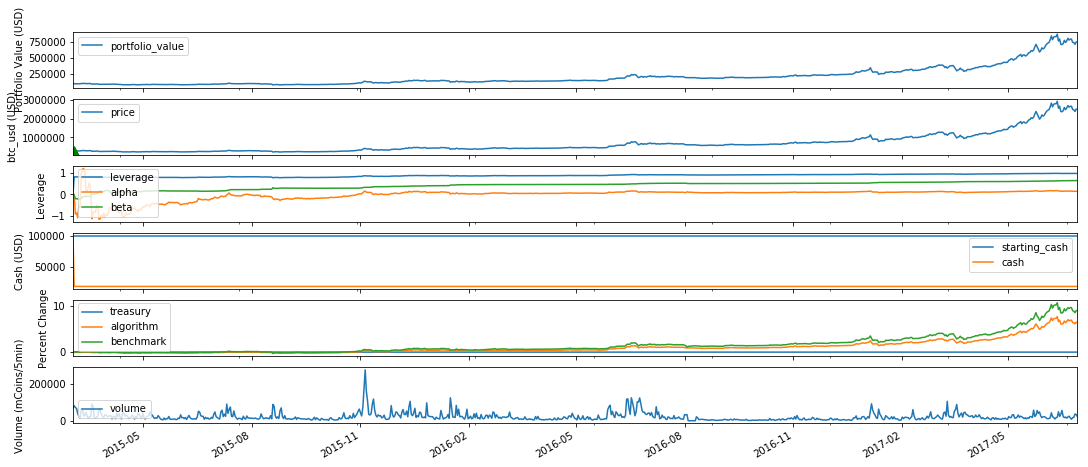

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,cash,ending_cash,ending_exposure,...,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return,volume,treasury,algorithm,benchmark
2015-03-02 23:59:00+00:00,NaN,0.000000,NaN,0.000000,NaN,NaN,0.000000,100000.000000,100000.000000,0.000000,...,100000.0,0.000000,0.000000,1,[],0.0208,67168.440498,0.0208,0.000000,0.000000
2015-03-03 23:59:00+00:00,0.019291,-0.001719,0.000000,0.060397,0.677953,-0.028454,-82000.196612,17999.803388,17999.803388,81828.340723,...,100000.0,0.000000,0.000000,2,"[{u'commission': None, u'amount': 288.38181752...",0.0212,81226.398297,0.0212,-0.001719,0.060397
2015-03-04 23:59:00+00:00,0.268353,-0.031768,-0.902481,0.111111,0.505876,-0.194745,0.000000,17999.803388,17999.803388,78823.402184,...,100000.0,81828.340723,81828.340723,3,[],0.0212,71521.587766,0.0212,-0.031768,0.111111
2015-03-05 23:59:00+00:00,0.288228,-0.019194,-0.859901,0.019842,1.025202,-0.198788,0.000000,17999.803388,17999.803388,80080.746909,...,100000.0,78823.402184,78823.402184,4,[],0.0211,66108.884634,0.0211,-0.019194,0.019842
2015-03-06 23:59:00+00:00,0.256028,-0.031681,-1.083361,0.043651,0.895850,-0.203731,0.000000,17999.803388,17999.803388,78832.053639,...,100000.0,80080.746909,80080.746909,5,[],0.0224,40276.571970,0.0224,-0.031681,0.043651
2015-03-07 23:59:00+00:00,0.254303,-0.021271,-0.521371,0.031746,0.813068,-0.220947,0.000000,17999.803388,17999.803388,79873.112000,...,100000.0,78832.053639,78832.053639,6,[],0.0224,22856.945604,0.0224,-0.021271,0.031746
2015-03-08 23:59:00+00:00,0.232174,-0.025251,-0.594399,0.031746,0.743200,-0.220122,0.000000,17999.803388,17999.803388,79475.145089,...,100000.0,79873.112000,79873.112000,7,[],0.0224,13853.794890,0.0224,-0.025251,0.031746
2015-03-09 23:59:00+00:00,0.349691,0.019189,0.965871,0.047619,0.690333,-0.186348,0.000000,17999.803388,17999.803388,83919.108900,...,100000.0,79475.145089,79475.145089,8,[],0.0220,62908.377680,0.0220,0.019189,0.047619
2015-03-10 23:59:00+00:00,0.327277,0.023861,1.177039,0.154762,0.820291,-0.107546,0.000000,17999.803388,17999.803388,84386.287445,...,100000.0,83919.108900,83919.108900,9,[],0.0214,67389.782195,0.0214,0.023861,0.154762
2015-03-11 23:59:00+00:00,0.311427,0.035339,1.208448,0.095238,0.847082,-0.109954,0.000000,17999.803388,17999.803388,85534.047078,...,100000.0,84386.287445,84386.287445,10,[],0.0211,25811.471790,0.0211,0.035339,0.095238


In [4]:
%%catalyst --start 2015-3-2 --end 2017-6-28 --capital-base 100000 -x bitfinex -c usd

from catalyst.finance.slippage import VolumeShareSlippage

from catalyst.api import (
    order_target_value,
    symbol,
    record,
    cancel_order,
    get_open_orders,
)

def initialize(context):
    context.ASSET_NAME = 'btc_usd'
    context.TARGET_HODL_RATIO = 0.8
    context.RESERVE_RATIO = 1.0 - context.TARGET_HODL_RATIO

    # For all trading pairs in the poloniex bundle, the default denomination
    # currently supported by Catalyst is 1/1000th of a full coin. Use this
    # constant to scale the price of up to that of a full coin if desired.
    context.TICK_SIZE = 1000.0

    context.is_buying = True
    context.asset = symbol(context.ASSET_NAME)

    context.i = 0

def handle_data(context, data):
    context.i += 1

    starting_cash = context.portfolio.starting_cash
    target_hodl_value = context.TARGET_HODL_RATIO * starting_cash
    reserve_value = context.RESERVE_RATIO * starting_cash

    # Cancel any outstanding orders
    orders = get_open_orders(context.asset) or []
    for order in orders:
        cancel_order(order)

    # Stop buying after passing the reserve threshold
    cash = context.portfolio.cash
    if cash <= reserve_value:
        context.is_buying = False

    # Retrieve current asset price from pricing data
    price = data.current(context.asset, 'price')

    # Check if still buying and could (approximately) afford another purchase
    if context.is_buying and cash > price:
        # Place order to make position in asset equal to target_hodl_value
        order_target_value(
            context.asset,
            target_hodl_value,
            limit_price=price*1.1,
        )

    record(
        price=price,
        volume=data.current(context.asset, 'volume'),
        cash=cash,
        starting_cash=context.portfolio.starting_cash,
        leverage=context.account.leverage,
    )

def analyze(context=None, results=None):
    import matplotlib.pyplot as plt

    # Plot the portfolio and asset data.
    ax1 = plt.subplot(611)
    results[['portfolio_value']].plot(ax=ax1)
    ax1.set_ylabel('Portfolio Value (USD)')

    ax2 = plt.subplot(612, sharex=ax1)
    ax2.set_ylabel('{asset} (USD)'.format(asset=context.ASSET_NAME))
    (context.TICK_SIZE * results[['price']]).plot(ax=ax2)

    trans = results.ix[[t != [] for t in results.transactions]]
    buys = trans.ix[
        [t[0]['amount'] > 0 for t in trans.transactions]
    ]
    ax2.plot(
        buys.index,
        context.TICK_SIZE * results.price[buys.index],
        '^',
        markersize=10,
        color='g',
    )

    ax3 = plt.subplot(613, sharex=ax1)
    results[['leverage', 'alpha', 'beta']].plot(ax=ax3)
    ax3.set_ylabel('Leverage ')

    ax4 = plt.subplot(614, sharex=ax1)
    results[['starting_cash', 'cash']].plot(ax=ax4)
    ax4.set_ylabel('Cash (USD)')

    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]] = results[[
        'treasury_period_return',
        'algorithm_period_return',
        'benchmark_period_return',
    ]]

    ax5 = plt.subplot(615, sharex=ax1)
    results[[
        'treasury',
        'algorithm',
        'benchmark',
    ]].plot(ax=ax5)
    ax5.set_ylabel('Percent Change')

    ax6 = plt.subplot(616, sharex=ax1)
    results[['volume']].plot(ax=ax6)
    ax6.set_ylabel('Volume (mCoins/5min)')

    plt.legend(loc=3)

    # Show the plot.
    plt.gcf().set_size_inches(18, 8)
    plt.show()

In [9]:
from __future__ import division
import os
import pytz
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import datetime

from catalyst.api import record, symbol, symbols, order_target_percent
from catalyst.utils.run_algo import run_algorithm

np.set_printoptions(threshold='nan', suppress=True)


def initialize(context):
   # Portfolio assets list
   context.assets = symbols('btc_usdt', 'eth_usdt', 'ltc_usdt', 'dash_usdt',
                            'xmr_usdt')
   context.nassets = len(context.assets)
   # Set the time window that will be used to compute expected return
   # and asset correlations
   context.window = 180
   # Set the number of days between each portfolio rebalancing
   context.rebalance_period = 30
   context.i = 0


def handle_data(context, data):
   # Only rebalance at the beggining of the algorithm execution and
   # every multiple of the rebalance period
   if context.i == 0 or context.i%context.rebalance_period == 0:
       n = context.window
       prices = data.history(context.assets, fields='price',
                             bar_count=n+1, frequency='1d')
       pr = np.asmatrix(prices)
       t_prices = prices.iloc[1:n+1]
       t_val = t_prices.values
       tminus_prices = prices.iloc[0:n]
       tminus_val = tminus_prices.values
       # Compute daily returns (r)
       r = np.asmatrix(t_val/tminus_val-1)
       # Compute the expected returns of each asset with the average
       # daily return for the selected time window
       m = np.asmatrix(np.mean(r, axis=0))
       # ###
       stds = np.std(r, axis=0)
       # Compute excess returns matrix (xr)
       xr = r - m
       # Matrix algebra to get variance-covariance matrix
       cov_m = np.dot(np.transpose(xr),xr)/n
       # Compute asset correlation matrix (informative only)
       corr_m = cov_m/np.dot(np.transpose(stds),stds)

       # Define portfolio optimization parameters
       n_portfolios = 50000
       results_array = np.zeros((3+context.nassets,n_portfolios))
       for p in xrange(n_portfolios):
           weights = np.random.random(context.nassets)
           weights /= np.sum(weights)
           w = np.asmatrix(weights)
           p_r = np.sum(np.dot(w,np.transpose(m)))*365
           p_std = np.sqrt(np.dot(np.dot(w,cov_m),np.transpose(w)))*np.sqrt(365)

           #store results in results array
           results_array[0,p] = p_r
           results_array[1,p] = p_std
           #store Sharpe Ratio (return / volatility) - risk free rate element
           #excluded for simplicity
           results_array[2,p] = results_array[0,p] / results_array[1,p]
           i = 0
           for iw in weights:
               results_array[3+i,p] = weights[i]
               i += 1

       #convert results array to Pandas DataFrame
       results_frame = pd.DataFrame(np.transpose(results_array),
                          columns=['r','stdev','sharpe']+context.assets)
       #locate position of portfolio with highest Sharpe Ratio
       max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
       #locate positon of portfolio with minimum standard deviation
       min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

       #order optimal weights for each asset
       for asset in context.assets:
           if data.can_trade(asset):
               order_target_percent(asset, max_sharpe_port[asset])

       #create scatter plot coloured by Sharpe Ratio
       plt.scatter(results_frame.stdev,results_frame.r,c=results_frame.sharpe,cmap='RdYlGn')
       plt.xlabel('Volatility')
       plt.ylabel('Returns')
       plt.colorbar()
       #plot red star to highlight position of portfolio with highest Sharpe Ratio
       plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker='o',color='b',s=200)
       #plot green star to highlight position of minimum variance portfolio
       plt.show()
       print(max_sharpe_port)
       record(pr=pr,r=r, m=m, stds=stds ,max_sharpe_port=max_sharpe_port, corr_m=corr_m)
   context.i += 1


def analyze(context=None, results=None):
   # Form DataFrame with selected data
   data = results[['pr','r','m','stds','max_sharpe_port','corr_m','portfolio_value']]

   # Save results in CSV file
   #filename = os.path.splitext(os.path.basename(__file__))[0]
   data.to_csv(filename + '.csv')


# Bitcoin data is available from 2015-3-2. Dates vary for other tokens.
start = datetime(2017, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2017, 12, 16, 0, 0, 0, 0, pytz.utc)
results = run_algorithm(initialize=initialize,
                        handle_data=handle_data,
                        analyze=analyze,
                        start=start,
                        end=end,
                        exchange_name='poloniex',
                        capital_base=100000, )

[2018-01-04 16:26:22.695461] INFO: run_algo: running algo in paper-trading mode
[2018-01-04 16:26:24.483393] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-01-03 19:26:30+00:00.


IndexError: index 1405 is out of bounds for axis 0 with size 1405

In [19]:
import talib
import pandas as pd
from logbook import Logger

from catalyst.api import (
    order,
    order_target_percent,
    symbol,
    record,
    get_open_orders,
)

from catalyst.utils.run_algo import run_algorithm

algo_namespace = 'buy_the_dip_live'
log = Logger('buy low sell high')


def initialize(context):
    log.info('initializing algo')
    context.ASSET_NAME = 'btc_usdt'
    context.asset = symbol(context.ASSET_NAME)

    context.TARGET_POSITIONS = 30
    context.PROFIT_TARGET = 0.1
    context.SLIPPAGE_ALLOWED = 0.02

    context.errors = []
    pass


def _handle_data(context, data):
    price = data.current(context.asset, 'price')
    log.info('got price {price}'.format(price=price))

    prices = data.history(
        context.asset,
        fields='price',
        bar_count=20,
        frequency='1T'
    )
    rsi = talib.RSI(prices.values, timeperiod=14)[-1]
    log.info('got rsi: {}'.format(rsi))

    # Buying more when RSI is low, this should lower our cost basis
    if rsi <= 30:
        buy_increment = 1
    elif rsi <= 40:
        buy_increment = 0.5
    elif rsi <= 70:
        buy_increment = 0.2
    else:
        buy_increment = 0.1

    cash = context.portfolio.cash
    log.info('base currency available: {cash}'.format(cash=cash))

    record(
        price=price,
        rsi=rsi,
    )

    orders = get_open_orders(context.asset)
    if orders:
        log.info('skipping bar until all open orders execute')
        return

    is_buy = False
    cost_basis = None
    if context.asset in context.portfolio.positions:
        position = context.portfolio.positions[context.asset]

        cost_basis = position.cost_basis
        log.info(
            'found {amount} positions with cost basis {cost_basis}'.format(
                amount=position.amount,
                cost_basis=cost_basis
            )
        )

        if position.amount >= context.TARGET_POSITIONS:
            log.info('reached positions target: {}'.format(position.amount))
            return

        if price < cost_basis:
            is_buy = True
        elif (position.amount > 0
              and price > cost_basis * (1 + context.PROFIT_TARGET)):
            profit = (price * position.amount) - (cost_basis * position.amount)
            log.info('closing position, taking profit: {}'.format(profit))
            order_target_percent(
                asset=context.asset,
                target=0,
                limit_price=price * (1 - context.SLIPPAGE_ALLOWED),
            )
        else:
            log.info('no buy or sell opportunity found')
    else:
        is_buy = True

    if is_buy:
        if buy_increment is None:
            log.info('the rsi is too high to consider buying {}'.format(rsi))
            return

        if price * buy_increment > cash:
            log.info('not enough base currency to consider buying')
            return

        log.info(
            'buying position cheaper than cost basis {} < {}'.format(
                price,
                cost_basis
            )
        )
        order(
            asset=context.asset,
            amount=buy_increment,
            limit_price=price * (1 + context.SLIPPAGE_ALLOWED)
        )


def handle_data(context, data):
    log.info('handling bar {}'.format(data.current_dt))
    # try:
    _handle_data(context, data)
    # except Exception as e:
    #     log.warn('aborting the bar on error {}'.format(e))
    #     context.errors.append(e)

    log.info('completed bar {}, total execution errors {}'.format(
        data.current_dt,
        len(context.errors)
    ))

    if len(context.errors) > 0:
        log.info('the errors:\n{}'.format(context.errors))


def analyze(context, stats):
    log.info('the daily stats:\n{}'.format(get_pretty_stats(stats)))
    pass


def prepare_stats(stats, recorded_cols=list()):
    """
    Prepare the stats DataFrame for user-friendly output.
    Parameters
    ----------
    stats: list[Object]
    recorded_cols: list[str]
    Returns
    -------
    """
    asset_cols = list()

    stats = copy.deepcopy(stats)
    # Using a copy since we are adding rows inside the loop.
    for row_index, row_data in enumerate(list(stats)):
        assets = [p['sid'] for p in row_data['positions']]

        asset_values = dict()
        if recorded_cols is not None:
            for column in recorded_cols[:]:
                value = row_data[column]
                if isinstance(value, pd.Series):
                    value = value.to_dict()

                if type(value) is dict:
                    for asset in value:
                        if not isinstance(asset, TradingPair):
                            break

                        if asset not in assets:
                            assets.append(asset)

                        if asset not in asset_values:
                            asset_values[asset] = dict()

                        asset_values[asset][column] = value[asset]

        if len(assets) == 1:
            row = stats[row_index]
            asset_cols = set_position_row(row, assets[0], asset_values)

        elif len(assets) > 1:
            for asset_index, asset in enumerate(assets):
                if asset_index > 0:
                    row = copy.deepcopy(row_data)
                    stats.append(row)

                else:
                    row = stats[row_index]

                asset_cols = set_position_row(row, assets[asset_index],
                                              asset_values)

    df = pd.DataFrame(stats)

    index_cols = [
        'period_close', 'starting_cash', 'ending_cash', 'portfolio_value',
        'pnl', 'long_exposure', 'short_exposure', 'orders', 'transactions',
    ]

    # Removing the asset specific entries
    if recorded_cols is not None:
        recorded_cols = [x for x in recorded_cols if x not in asset_cols]
        for column in recorded_cols:
            index_cols.append(column)

    df['orders'] = df['orders'].apply(lambda orders: len(orders))
    df['transactions'] = df['transactions'].apply(
        lambda transactions: len(transactions)
    )

    if asset_cols:
        columns = asset_cols
        df.set_index(index_cols, drop=True, inplace=True)

    else:
        columns = index_cols
        columns.remove('period_close')
        df.set_index('period_close', drop=False, inplace=True)

    df.dropna(axis=1, how='all', inplace=True)
    df.sort_index(axis=0, level=0, inplace=True)

    return df, columns


def get_pretty_stats(stats, recorded_cols=None, num_rows=10):
    """
    Format and print the last few rows of a statistics DataFrame.
    See the pyfolio project for the data structure.
    Parameters
    ----------
    stats: list[Object]
        An array of statistics for the period.
    num_rows: int
        The number of rows to display on the screen.
    Returns
    -------
    str
    """
    if isinstance(stats, pd.DataFrame):
        stats = stats.T.to_dict().values()

    display_stats = stats[-num_rows:] if len(stats) > num_rows else stats
    df, columns = prepare_stats(
        display_stats, recorded_cols=recorded_cols
    )

    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('precision', 8)
    pd.set_option('display.width', 1000)
    pd.set_option('display.max_colwidth', 1000)

    return df.to_string(columns=columns)


if __name__ == '__main__':
    live = False
    if live:
        run_algorithm(
            capital_base=0.001,
            initialize=initialize,
            handle_data=handle_data,
            analyze=analyze,
            exchange_name='binance',
            live=True,
            algo_namespace=algo_namespace,
            base_currency='btc',
            simulate_orders=True,
        )
    else:
        run_algorithm(
            capital_base=10000,
            data_frequency='daily',
            initialize=initialize,
            handle_data=handle_data,
            analyze=analyze,
            exchange_name='poloniex',
            algo_namespace='buy_and_hodl',
            base_currency='usdt',
            simulate_orders=True,
            live=True,
#             start=pd.to_datetime('2015-03-01', utc=True),
#             end=pd.to_datetime('2017-10-31', utc=True),
        )

[2018-01-04 17:05:52.109429] INFO: run_algo: running algo in paper-trading mode
[2018-01-04 17:05:53.169307] INFO: exchange_bundle: pricing data for [u'btc_usdt'] not found in range 2015-03-01 00:00:00+00:00 to 2018-01-03 00:00:00+00:00, updating the bundles.


Ingesting daily price data for btc_usdt on poloniex


[2018-01-04 17:05:54.303744] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-01-04 16:35:41+00:00.


IndexError: index 1405 is out of bounds for axis 0 with size 1405

In [29]:
from catalyst.api import symbol
from catalyst.utils.run_algo import run_algorithm


def initialize(context):
    context.asset = symbol('btc_usdt')


def handle_data(context, data):
    data.history(context.asset, ['close'], bar_count=100, frequency='5T')


def analyze(context=None, results=None):
    pass


if __name__ == '__main__':
    run_algorithm(
        capital_base=100,
        initialize=initialize,
        handle_data=handle_data,
        analyze=analyze,
        exchange_name='bittrex',
        algo_namespace="bittrex_is_broken",
        base_currency='usdt',
        data_frequency='minute',
        simulate_orders=True,
        live=True)

[2018-01-04 17:30:59.411078] INFO: run_algo: running algo in paper-trading mode
[2018-01-04 17:31:00.547082] INFO: exchange_bundle: pricing data for [u'btc_usdt'] not found in range 2015-03-01 00:00:00+00:00 to 2018-01-03 00:00:00+00:00, updating the bundles.


Ingesting daily price data for btc_usdt on poloniex


[2018-01-04 17:31:01.825297] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-01-04 16:35:41+00:00.


IndexError: index 1405 is out of bounds for axis 0 with size 1405